In [2]:
import np as np
import torch

x_data = torch.load("image_features_from_efficient_net_with_meta.pt.nosync")
y_data = torch.load("targets_for_image_features_from_efficient_net_with_meta.pt.nosync")

In [3]:
features = [d[0] for d in x_data]
len(features)

2304

In [4]:
y = [d.item() for d in y_data]
y

[1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.asarray(features) + 100, y, random_state=3451, test_size=0.15)
len(X_train)

1958

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(max_iter=10_000, probability=True),
    'Random Forest': RandomForestClassifier(),
    'Complement Naive Bayes': ComplementNB()
}


# Create a function to train and evaluate classifiers
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = np.asarray(classifier.predict_proba(X_test))[:, 1]

    f1 = probabilistic_f1(np.asarray(y_test), y_prob)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    auroc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    return accuracy, precision, recall, f1, auroc


def probabilistic_f1(labels, predictions, beta=1):
    pTP = np.sum(labels * predictions)
    pFP = np.sum((1 - labels) * predictions)
    num_positives = np.sum(labels)  #  = pTP+pFN

    pPrecision = pTP / (pTP + pFP)
    pRecall = pTP / num_positives

    beta_squared = beta ** 2

    if pPrecision > 0 and pRecall > 0:
        pF1 = (1 + beta_squared) * pPrecision * pRecall / (beta_squared * pPrecision + pRecall)
        return pF1
    else:
        return 0


results = dict(zip(classifiers.keys(), [dict() for _ in range(len(classifiers))]))
for clf_name, clf in classifiers.items():
    print(clf_name)
    accuracy, precision, recall, f1, auroc = train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test)

    results[clf_name]['Accuracy'] = accuracy
    results[clf_name]['Precision'] = precision
    results[clf_name]['Recall'] = recall
    results[clf_name]['F1 Score'] = f1
    results[clf_name]['AUROC'] = auroc

Logistic Regression
SVM


/Users/ostapbodnar/.virtualenvs/nulp-ml-masters-degree/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest
Complement Naive Bayes


In [48]:
import torch.nn as nn


class DeepNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.seq_1 = nn.Sequential(
            nn.Linear(1000, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )
        self.seq_2 = nn.Sequential(
            nn.Linear(2, 2),
            nn.ReLU(),
            nn.Linear(2, 1),
            nn.Sigmoid()
        )
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x1, x2):
        out_1 = self.seq_1(x1)
        out_2 = self.seq_2(x2)

        out = torch.cat([out_1, out_2], dim=1)
        out = self.linear(out)
        out = self.sigmoid(out)
        return out

In [43]:
metadata = torch.tensor([(f[1], f[2]) for f in x_data]).float()

In [54]:
from torch.utils.data import TensorDataset, DataLoader

X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(features, metadata, torch.tensor(
    np.array(y).reshape((-1, 1))).float(), test_size=0.15, random_state=3451)

train_dataset = TensorDataset(torch.Tensor(np.asarray(X1_train)).float(), X2_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(torch.Tensor(np.asarray(X1_val)).float(), X2_val, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32)

Epoch 1, Validation Loss: 0.7, F1 Score: 0.481 Training Loss: 0.701, F1 Score: 0.466
Epoch 2, Validation Loss: 0.699, F1 Score: 0.483 Training Loss: 0.697, F1 Score: 0.477
Epoch 3, Validation Loss: 0.698, F1 Score: 0.485 Training Loss: 0.697, F1 Score: 0.479
Epoch 4, Validation Loss: 0.697, F1 Score: 0.487 Training Loss: 0.695, F1 Score: 0.479
Epoch 5, Validation Loss: 0.695, F1 Score: 0.488 Training Loss: 0.695, F1 Score: 0.482
Epoch 6, Validation Loss: 0.695, F1 Score: 0.49 Training Loss: 0.694, F1 Score: 0.481
Epoch 7, Validation Loss: 0.692, F1 Score: 0.49 Training Loss: 0.693, F1 Score: 0.483
Epoch 8, Validation Loss: 0.691, F1 Score: 0.489 Training Loss: 0.691, F1 Score: 0.485
Epoch 9, Validation Loss: 0.691, F1 Score: 0.488 Training Loss: 0.689, F1 Score: 0.485
Epoch 10, Validation Loss: 0.689, F1 Score: 0.495 Training Loss: 0.689, F1 Score: 0.483
Epoch 11, Validation Loss: 0.689, F1 Score: 0.492 Training Loss: 0.689, F1 Score: 0.49
Epoch 12, Validation Loss: 0.687, F1 Score: 0.

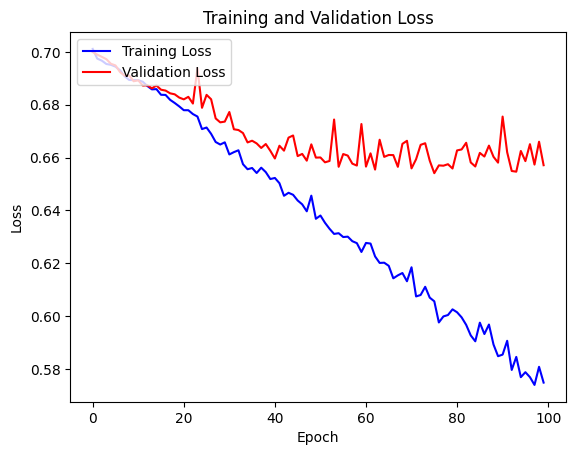

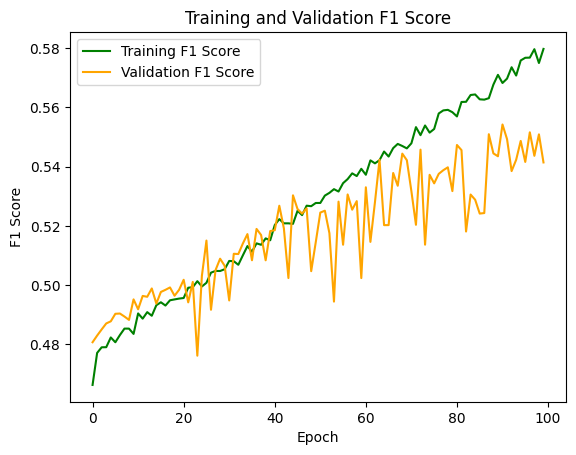

In [65]:
from torch import optim

model = DeepNN()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003)

num_epochs = 100

train_losses = []
val_losses = []
train_f1_scores = []
val_f1_scores = []

for epoch in range(num_epochs):
    plt.clf()
    running_loss = 0.0
    model.train()  # Set the model to training mode
    train_predictions = []
    train_labels = []

    for i, data in enumerate(train_dataloader, 0):
        inputs1, inputs2, labels = data

        optimizer.zero_grad()

        outputs = model(inputs1, inputs2)
        loss = criterion(outputs, labels)

        train_predictions.extend(outputs.detach().numpy().flatten())
        train_labels.extend(labels.detach().numpy().flatten())

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / (i + 1)
    train_losses.append(train_loss)
    train_f1 = probabilistic_f1(np.asarray(train_labels), np.round(train_predictions, decimals=2))
    train_f1_scores.append(train_f1)

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_predictions = []
    val_labels = []

    with torch.no_grad():
        for i, data in enumerate(val_dataloader, 0):
            inputs1, inputs2, labels = data

            outputs = model(inputs1, inputs2)
            loss = criterion(outputs, labels)

            val_predictions.extend(outputs.detach().numpy().flatten())
            val_labels.extend(labels.detach().numpy().flatten())

            val_loss += loss.item()

    val_loss = val_loss / (i + 1)
    val_losses.append(val_loss)
    val_f1 = probabilistic_f1(np.asarray(val_labels), np.asarray(val_predictions))
    val_f1_scores.append(val_f1)

    print(
        f'Epoch {epoch + 1}, Validation Loss: {round(val_loss, 3)}, F1 Score: {round(val_f1, 3)} Training Loss: {round(train_loss, 3)}, F1 Score: {round(train_f1, 3)}')

# Real-time visualization
plt.figure(1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.figure(2)
plt.plot(train_f1_scores, label='Training F1 Score', color='green')
plt.plot(val_f1_scores, label='Validation F1 Score', color='orange')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend(loc='upper left')
plt.title('Training and Validation F1 Score')

plt.show(block=False)

y_pred = np.asarray(val_predictions) > 0.5
accuracy = accuracy_score(val_labels, y_pred)
precision = precision_score(val_labels, y_pred, average='weighted')
recall = recall_score(val_labels, y_pred, average='weighted')
auroc = roc_auc_score(val_labels, val_predictions, multi_class='ovr')

clf_name = "DeepNN - val"
results[clf_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': val_f1,
    'AUROC': auroc,
}
y_pred = np.asarray(train_predictions) > 0.5
accuracy = accuracy_score(train_labels, y_pred)
precision = precision_score(train_labels, y_pred, average='weighted')
recall = recall_score(train_labels, y_pred, average='weighted')
auroc = roc_auc_score(train_labels, train_predictions, multi_class='ovr')

clf_name = "DeepNN - train"
results[clf_name] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': train_f1,
    'AUROC': auroc,
}


In [66]:
torch.save(model.state_dict(), "deep_nn.pth")

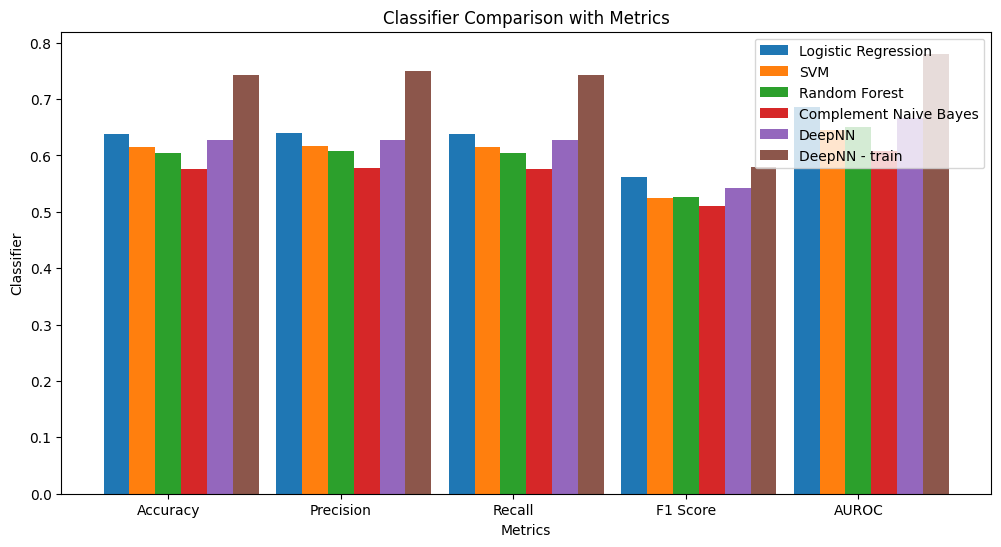

F1 Scores:
Logistic Regression: 0.5621389544457032
SVM: 0.5245101887396694
Random Forest: 0.5261763520129009
Complement Naive Bayes: 0.5100094180966807
DeepNN: 0.5414110679883937
DeepNN - train: 0.5797783743285003


In [81]:
import matplotlib as mpl

classifiers_list = list(results.keys())
metrics = list(results[classifiers_list[0]].keys())
colors = mpl.colormaps['tab10'].colors

plt.figure(figsize=(12, 6))
width = 0.15
x = np.arange(len(metrics))

for i, classifier in enumerate(classifiers_list):
    plt.bar(x + width * i, [results[classifier][metric] for metric in metrics], width, label=classifier,
            color=colors[i])

plt.ylabel('Classifier')
plt.xlabel('Metrics')
plt.title('Classifier Comparison with Metrics')
plt.xticks(x + width * 2, metrics)
plt.legend(loc='upper right')
plt.show()

print("F1 Scores:")
for clf_name, f1 in results.items():
    print(f"{clf_name}: {f1['F1 Score']}")
